# **Netflix data set exploration**



Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

**Business problem**

Netflix wants to know which type of shows/movies to produce and how they can grow the business in different countries.*italicized text*

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix.csv')

Finding Shape and datatypes of the DataFrame

In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


1. As you can see the Netflix dataset has initial rows amounting to 8807 in total and columns amounting to 12.

2. In total six columns have some amount of Null values ('director', 'cast', 'country', date_added', 'rating', 'duration',)

3. And as you can observe 'release_year' was the only 'int-type' column and rest of others are string/object datatypes.

---> Below are the codes for splitting the strings inside various categorical columns

In [5]:
title_df = df["title"]

In [6]:
country_df = df['country']

In [7]:
cast_df = df['cast']

In [8]:
director_df = df['director']

In [9]:
rating_df = df['rating']

In [10]:
listed_in_df = df['listed_in']

In [11]:
def split_cast_names(inp):
  return str(inp).split(', ')

In [12]:
df['country'] = country_df.apply(split_cast_names)

In [13]:
df['cast']= cast_df.apply(split_cast_names)

In [14]:
df['director']= director_df.apply(split_cast_names)

In [15]:
df['rating'] = rating_df.apply(split_cast_names)

In [16]:
df['listed_in'] = listed_in_df.apply(split_cast_names)

1. When we observe the entire dataset, we can come to the conclusion that **various columns in the dataset** have mutliple **string values** which needed to be splitted into various individual rows to ascertain proper results and it is utmost for reliable data analysis

---> Below is the DataFrame showing the result of split and that of how every string in each row of each column formed as a list

In [17]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[nan],[United States],"September 25, 2021",2020,[PG-13],90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,[nan],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],"September 24, 2021",2021,[TV-MA],2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[nan],"September 24, 2021",2021,[TV-MA],1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...


---> After splitting, now we used **explode function** to make sure that each individual string of each column occupies each row; thus number of rows gets drastically increased to a staggering number of 201991.

In [18]:
df = df.explode('country')

In [19]:
df = df.explode('cast')

In [20]:
df = df.explode('director')

In [21]:
df = df.explode('listed_in')

In [22]:
df = df.explode('rating')

In [24]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,nan,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


---> Below is the DataFrame Replacing nan values of each column to 'NaN'.

In [25]:
df.replace('nan', np.NaN, inplace = True)

In [26]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."


---> Using fillna() to fill NaN values with corresponding values according to each type of column.

In [27]:
df['director'] = df['director'].fillna('unknown director')

In [28]:
df['cast'] = df['cast'].fillna('unknown cast')

In [29]:
df['country'] = df['country'].fillna('unknown country')

In [30]:
df['rating'] = df['rating'].fillna('unknown rating')

In [31]:
df['date_added'] = df['date_added'].fillna(0)


In [32]:
df['duration']= df['duration'].fillna('0')

---> DataFrame showing all replaced values for NaN types in each column

In [33]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,unknown director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


Summary : Till now, we have expolored the initial phases of the dataset, cleaned the outliners and adjusted columns with NaN valeus and splitted the grouped string values of each column into multiple rows.

<<<<<<<<--------------------------------------------------------->>>>>>>>

<<<<<<<<--------------------------------------------------------->>>>>>>>

**1. Count of categorical columns using non-graphical analysis.**

(i) title counts

In [34]:
No_of_unique_titles = df['title'].nunique()
No_of_unique_titles

8807

In [35]:
Number_of_unique_movies = df[df['type'] == 'Movie']['title'].nunique()
Number_of_unique_movies

6131

In [36]:
Number_of_unique_TVShows = df[df['type'] == 'TV Show']['title'].nunique()
Number_of_unique_TVShows

2676

(ii) director counts

In [37]:
No_of_unique_directors = df[df['director'] != 'unknown director']['director'].nunique()
No_of_unique_directors

4993

(iii) cast counts

In [38]:
No_of_unique_actors = df[df['cast'] != 'unknown cast']['cast'].nunique()
No_of_unique_actors

36439

(iv) country counts

In [39]:
No_of_unique_countries = df[df['country'] != 'unknown country']['country'].nunique()
No_of_unique_countries

127

(v) rating counts

In [40]:
No_of_unique_ratings = df[df['rating'] != 'unknown country']['rating'].nunique()
No_of_unique_ratings

18

(vi) listed_in counts

In [41]:
No_of_unique_genres = df['listed_in'].nunique()
No_of_unique_genres

42

<<<<<<<<--------------------------------------------------------->>>>>>>>

**2. Most Movies/TVshows produced grouping under different countries.**

(Movies vs TV shows)

(i) Count of Total movies produced grouping under different countries including NaN values marked as 'unknown country'



In [42]:
top_10_countries_in_movies_production = df[df['type'] == 'Movie'].groupby('country')['title'].nunique()
top_10_countries_in_movies_production = top_10_countries_in_movies_production.sort_values(ascending = False).head(10)
top_10_countries_in_movies_production = top_10_countries_in_movies_production.reset_index()
top_10_countries_in_movies_production

,country,title
0,United States,2751
1,India,962
2,United Kingdom,532
3,unknown country,440
4,Canada,319
5,France,303
6,Germany,182
7,Spain,171
8,Japan,119
9,China,114


Graphical representation of Top 10 countries in movie production

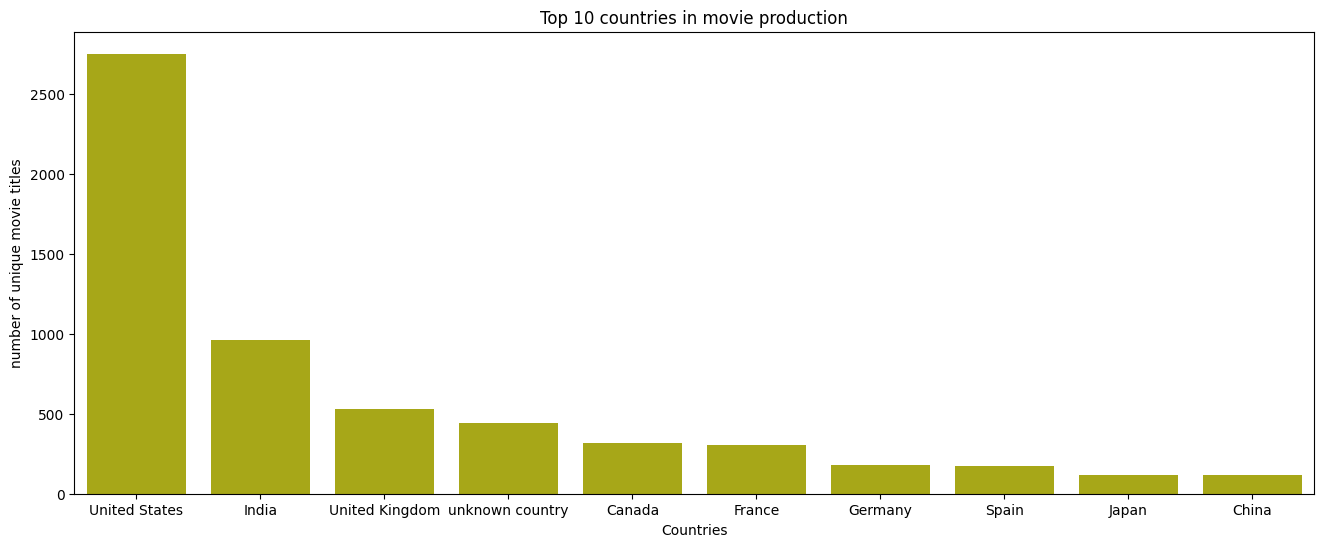

In [ ]:
plt.figure(figsize = (16,6))
sns.barplot(data = top_10_countries_in_movies_production, x = 'country', y = 'title', color = 'y')
plt.title('Top 10 countries in movie production')
plt.xlabel('Countries')
plt.ylabel('number of unique movie titles')
plt.show()


(ii) Count of Total shows produced grouping under different countries including NaN values marked as 'unknown country'

In [43]:
top_10_countries_in_shows_production = df[df['type'] == 'TV Show'].groupby('country')['title'].nunique()
top_10_countries_in_shows_production = top_10_countries_in_shows_production.sort_values(ascending = False).head(10)
top_10_countries_in_shows_production = top_10_countries_in_shows_production.reset_index()
top_10_countries_in_shows_production

,country,title
0,United States,938
1,unknown country,391
2,United Kingdom,272
3,Japan,199
4,South Korea,170
5,Canada,126
6,France,90
7,India,84
8,Taiwan,70
9,Australia,66


Graphical representation of Top 10 countries in TVshows production

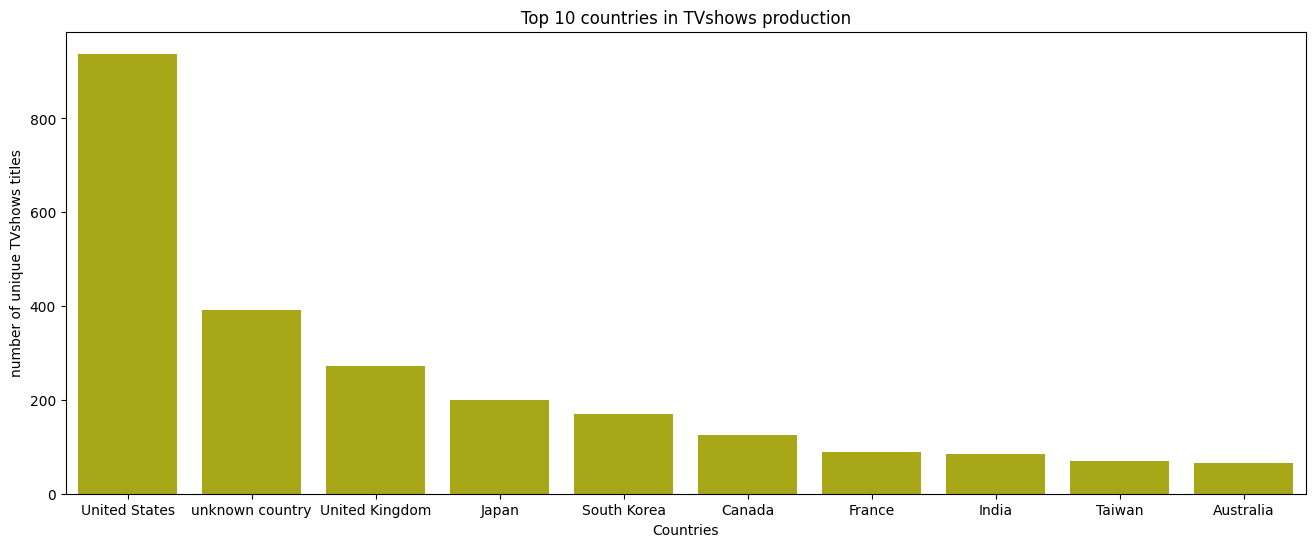

In [ ]:
plt.figure(figsize = (16,6))
sns.barplot(data = top_10_countries_in_shows_production, x = 'country', y = 'title', color = 'y')
plt.title('Top 10 countries in TVshows production')
plt.xlabel('Countries')
plt.ylabel('number of unique TVshows titles')
plt.show()

---> "Unknown countries" values are not considered.

**Insight :** (Movies) As you can observe in the graph for Top 10 countries with movies production; 'United states' which stood at the top alone contributes approx 44.8 % of total movies hosted on Netflix. And the next countries 'India' and then 'United kingdom' together have a combined share of 24.3 %. Now, summing all the three countries, we get a total combined percentage of 69.1 % of total movie production, which is almost 20 percent above the half of production.

(TV Shows) Looking at the graph of Tvshows, we can observe that 'United states' (35%) and 'United kingdom'(10%) again occupied the first and second position asusual, but the third place is now occupied by Japan(7.43 %). Even the fourth place occupied by 'Korea'(6.35 %) is also very promising in future growth rate for TVshows production in their country. Thus, combined contribution of all top four countries in TVshows is almost 58.78%


**Recommendation:** Focussing on both US and UK is of utmost priority as they occupied the top spots in the Netflix hosting platform as highest contributors for most number of movies and TVshows and then emerging markets like 'India for movies and 'Japan & Korea' for Tvshows are also pretty great options for growth and diversty.

<<<<<<<<--------------------------------------------------------->>>>>>>>

**3. How was number of Movies/TVshows releases changed over time since past 30 years?**

(i) Change of Number of Movies releases through time

In [44]:
Movies_released_throughout_years_of_time = df[df['type'] == 'Movie'].groupby('release_year')['title'].nunique()
Movies_released_throughout_years_of_time = Movies_released_throughout_years_of_time.sort_index(ascending = False).head(30)
Movies_released_throughout_years_of_time = Movies_released_throughout_years_of_time.reset_index()
Movies_released_throughout_years_of_time

,release_year,title
0,2021,277
1,2020,517
2,2019,633
3,2018,767
4,2017,767
5,2016,658
6,2015,398
7,2014,264
8,2013,225
9,2012,173


Graphical represenatation of Number of movie releases since 1992



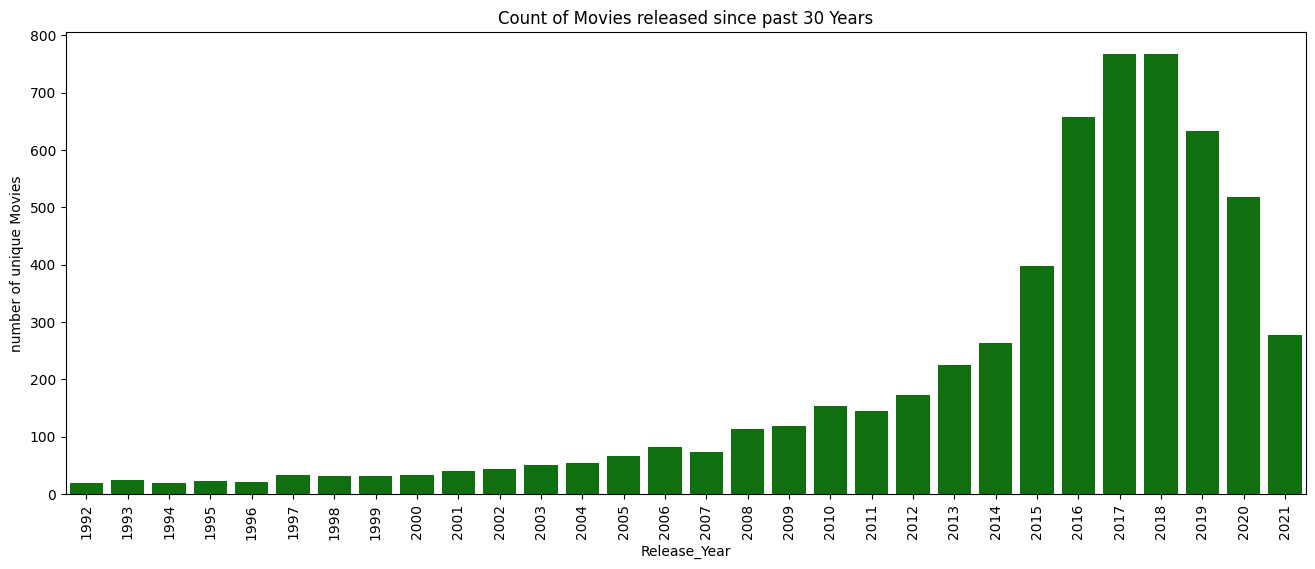

In [ ]:
plt.figure(figsize = (16,6))
sns.barplot(data = Movies_released_throughout_years_of_time, x = 'release_year', y = 'title', color = 'g')
plt.title('Count of Movies released since past 30 Years')
plt.xlabel('Release_Year')
plt.ylabel('number of unique Movies')
plt.xticks(rotation = 90)
plt.show()

Change of Number of TVshows releases

In [45]:
TVshows_released_throughout_years_of_time = df[df['type'] == 'TV Show'].groupby('release_year')['title'].nunique()
TVshows_released_throughout_years_of_time = TVshows_released_throughout_years_of_time.sort_index(ascending = False).head(30)
TVshows_released_throughout_years_of_time = TVshows_released_throughout_years_of_time.reset_index()
TVshows_released_throughout_years_of_time

,release_year,title
0,2021,315
1,2020,436
2,2019,397
3,2018,380
4,2017,265
5,2016,244
6,2015,162
7,2014,88
8,2013,63
9,2012,64


Graphical represenatation of Number of TVshows releases since 1992

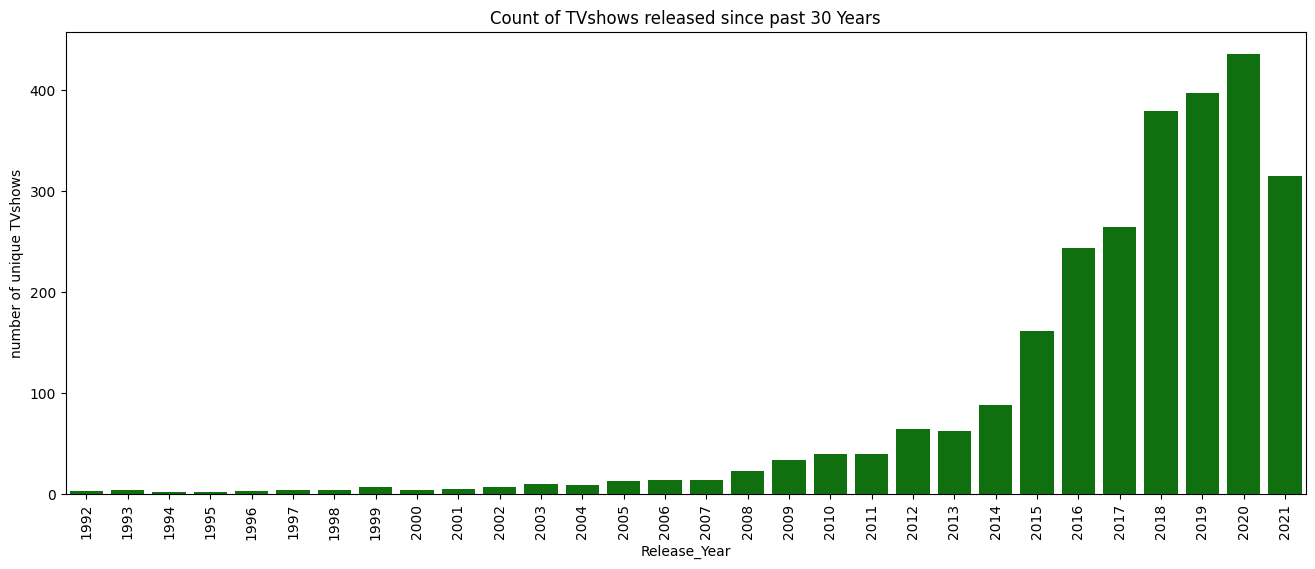

In [ ]:
plt.figure(figsize = (16,6))
sns.barplot(data = TVshows_released_throughout_years_of_time, x = 'release_year', y = 'title', color = 'g')
plt.title('Count of TVshows released since past 30 Years')
plt.xlabel('Release_Year')
plt.ylabel('number of unique TVshows')
plt.xticks(rotation = 90)
plt.show()

**Insight:** (Movies) Looking at the movies graph which are released since 1992, we can observe that netflix hosts most number of movie titles which were released in the period from 2015 to 2021. Almost a combined share of 65.5 % of total movies within the timeline of seven years. And most important insight would be of 2017 and 2018 which hold equal share in movie releases in the platform.

(TVshows) Looking at the graph of TVshows, we can observe that there was a rapid increment in the hosting of TVshows from 2013 and then the trend continued to escalate till 2020 and got suddenly reduced in 2021; it went below the graph line of of 2018, 2019 respectively. But specifically looking at the numbers, the releases from 2015-2021 holds a combined share of staggering 82.17 % of total shows.

**Recommendation:** Even though netflix was started in 1997, Majority of its hosting movies and TVshows were released on and after 2015. It means most of the content in netflix was latest and that should exactly be the business strategy of any content providing platform. Replacing the old content with new ones was the best approach that it can follow to maintain the viewership.


<<<<<<<<--------------------------------------------------------->>>>>>>>

**4. Top 10 best actors and directors in Movies/Tvshows.**

(i) Top 10 actors in movies and Tvshows

Top 10 actors in Movies

In [46]:
top_10_actors_in_Movies= df[df['type'] == 'Movie'].groupby('cast')['title'].nunique()
top_10_actors_in_Movies= top_10_actors_in_Movies.sort_values(ascending = False).head(10)
top_10_actors_in_Movies = top_10_actors_in_Movies.reset_index()
top_10_actors_in_Movies

,cast,title
0,unknown cast,475
1,Anupam Kher,42
2,Shah Rukh Khan,35
3,Naseeruddin Shah,32
4,Akshay Kumar,30
5,Om Puri,30
6,Amitabh Bachchan,28
7,Paresh Rawal,28
8,Julie Tejwani,28
9,Rupa Bhimani,27


Graphical representation of Top 10 actors in Movies

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'unknown cast'),
  Text(1, 0, 'Anupam Kher'),
  Text(2, 0, 'Shah Rukh Khan'),
  Text(3, 0, 'Naseeruddin Shah'),
  Text(4, 0, 'Akshay Kumar'),
  Text(5, 0, 'Om Puri'),
  Text(6, 0, 'Amitabh Bachchan'),
  Text(7, 0, 'Paresh Rawal'),
  Text(8, 0, 'Julie Tejwani'),
  Text(9, 0, 'Rupa Bhimani')])

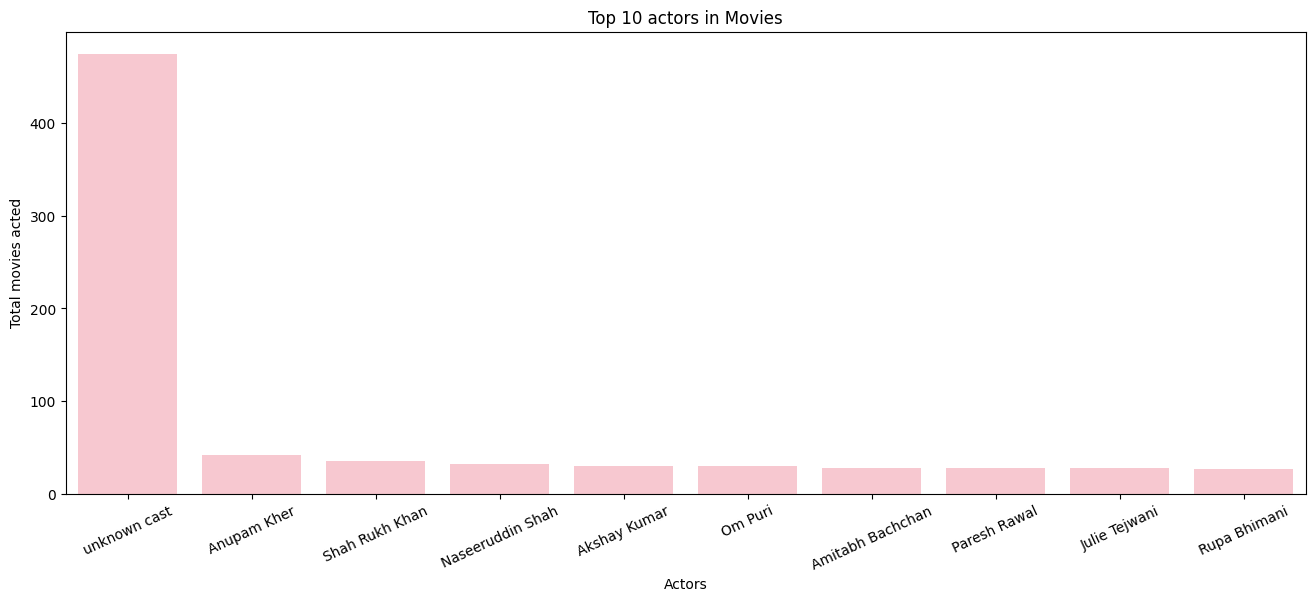

In [ ]:
plt.figure(figsize = (16,6))
sns.barplot(data = top_10_actors_in_Movies, x = 'cast', y = 'title', color = 'pink')
plt.title('Top 10 actors in Movies')
plt.xlabel('Actors')
plt.ylabel('Total movies acted')
plt.xticks(rotation = 25)

Top 10 actors in TVshows

In [47]:
top_10_actors_in_Tvshows= df[df['type'] == 'TV Show'].groupby('cast')['title'].nunique()
top_10_actors_in_Tvshows= top_10_actors_in_Tvshows.sort_values(ascending = False).head(10)
top_10_actors_in_Tvshows = top_10_actors_in_Tvshows.reset_index()
top_10_actors_in_Tvshows

,cast,title
0,unknown cast,350
1,Takahiro Sakurai,25
2,Yuki Kaji,19
3,Daisuke Ono,17
4,Ai Kayano,17
5,Junichi Suwabe,17
6,Yuichi Nakamura,16
7,Yoshimasa Hosoya,15
8,Jun Fukuyama,15
9,David Attenborough,14


Graphical representation of Top 10 actors in TV shows

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'unknown cast'),
  Text(1, 0, 'Takahiro Sakurai'),
  Text(2, 0, 'Yuki Kaji'),
  Text(3, 0, 'Daisuke Ono'),
  Text(4, 0, 'Ai Kayano'),
  Text(5, 0, 'Junichi Suwabe'),
  Text(6, 0, 'Yuichi Nakamura'),
  Text(7, 0, 'Yoshimasa Hosoya'),
  Text(8, 0, 'Jun Fukuyama'),
  Text(9, 0, 'David Attenborough')])

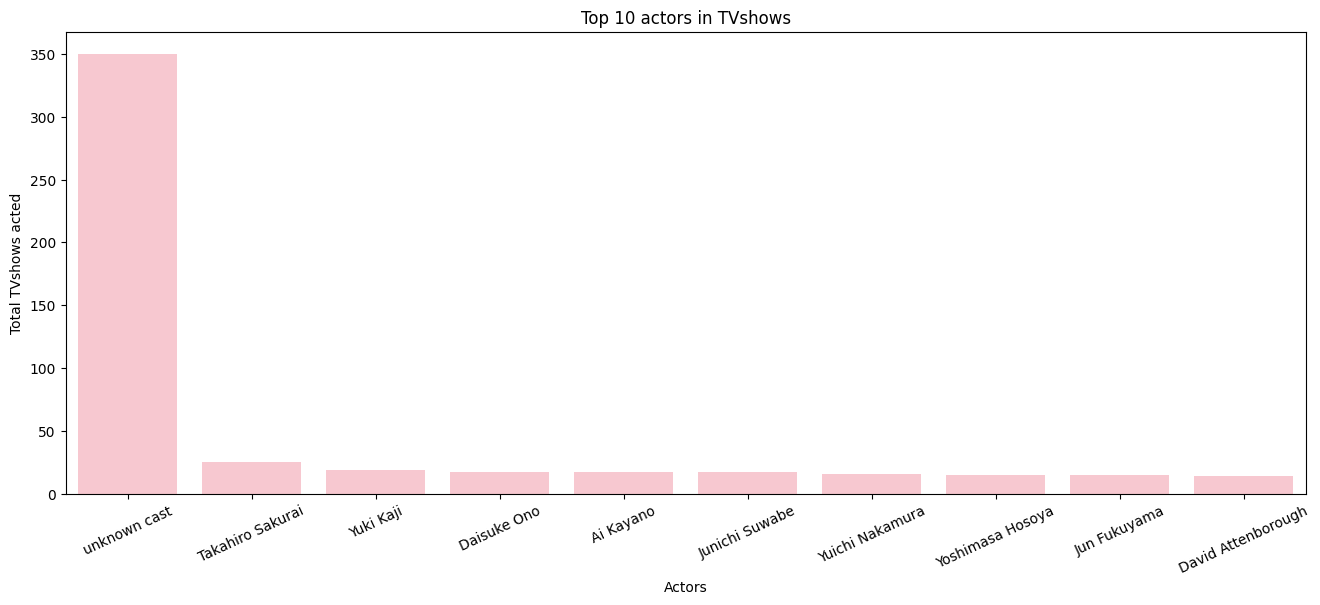

In [ ]:
plt.figure(figsize = (16,6))
sns.barplot(data = top_10_actors_in_Tvshows, x = 'cast', y = 'title', color = 'pink')
plt.title('Top 10 actors in TVshows')
plt.xlabel('Actors')
plt.ylabel('Total TVshows acted')
plt.xticks(rotation = 25)

Insight: (Movies): looking at the graph of top 10 actors in movies hosted in netflix, we can observe that actor named 'Anupham kher' stood at first with a total Movies count of 42 and then comes Sharukh khan with a total count of 35, interestingly both these people are from Bollywood film industry in India. And not only that, because, most of the actors who appeared in the list are actors from Bollywood.

(TVshows) : Coming to Tvshows, we know that india is still an emerging market in this area, thus most of the actors are from other parts of asia like Japan, korea, china etc.

Recommendation: As India was a major hotspot for movies, people in india are emotionally very connected to watch films. Thus, it would be an opportunity for netflix to promote Indian actors and cast them into new Movies. And for Tvshows, actors from Japan, Korea and china are the best fit.

(ii) Top 10 directors in Movies and TVshows

Top 10 directors in movies

In [48]:
top_10_directors_in_Movies= df[df['type'] == 'Movie'].groupby('director')['title'].nunique()
top_10_directors_in_Movies= top_10_directors_in_Movies.sort_values(ascending = False).head(10)
top_10_directors_in_Movies = top_10_directors_in_Movies.reset_index()
top_10_directors_in_Movies

,director,title
0,unknown director,188
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Suhas Kadav,16
5,Marcus Raboy,15
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Youssef Chahine,12
9,Martin Scorsese,12


Graphical represenatation of top 10 directors in Movies

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'unknown director'),
  Text(1, 0, 'Rajiv Chilaka'),
  Text(2, 0, 'Jan Suter'),
  Text(3, 0, 'Raúl Campos'),
  Text(4, 0, 'Suhas Kadav'),
  Text(5, 0, 'Marcus Raboy'),
  Text(6, 0, 'Jay Karas'),
  Text(7, 0, 'Cathy Garcia-Molina'),
  Text(8, 0, 'Youssef Chahine'),
  Text(9, 0, 'Martin Scorsese')])

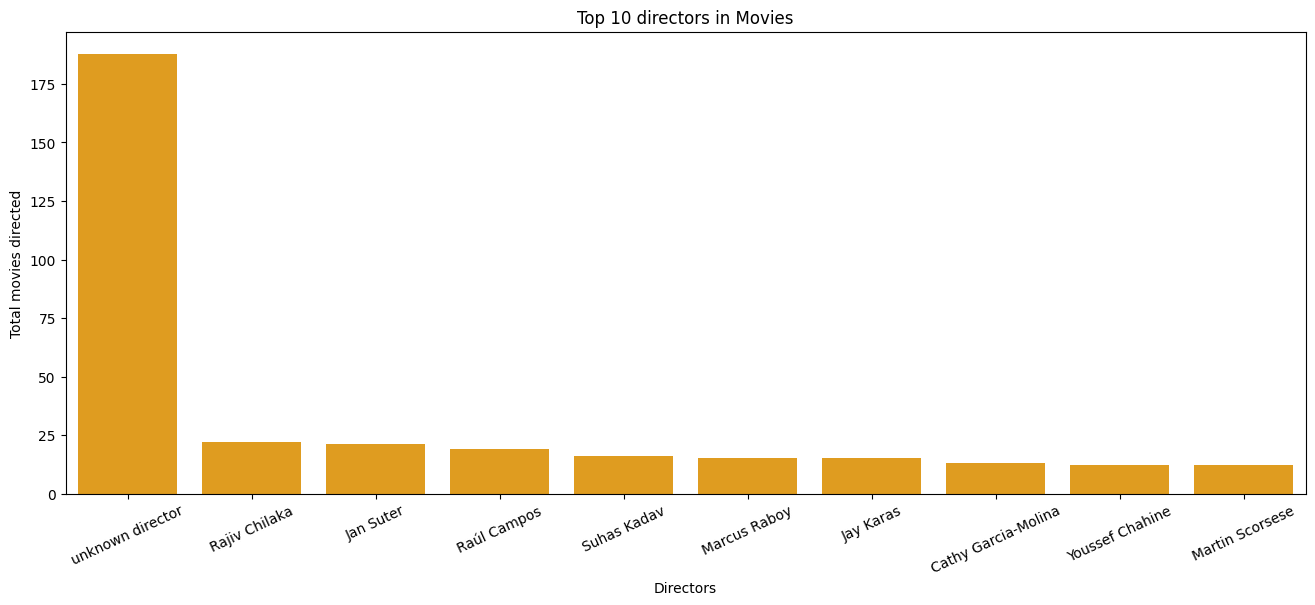

In [ ]:
plt.figure(figsize = (16,6))
sns.barplot(data = top_10_directors_in_Movies, x = 'director', y = 'title', color = 'orange')
plt.title('Top 10 directors in Movies')
plt.xlabel('Directors')
plt.ylabel('Total movies directed')
plt.xticks(rotation = 25)

Top 10 directors in TVshows

In [49]:
top_10_directors_in_TVshows= df[df['type'] == 'TV Show'].groupby('director')['title'].nunique()
top_10_directors_in_TVshows= top_10_directors_in_TVshows.sort_values(ascending = False).head(10)
top_10_directors_in_TVshows = top_10_directors_in_TVshows.reset_index()
top_10_directors_in_TVshows

,director,title
0,unknown director,2446
1,Ken Burns,3
2,Alastair Fothergill,3
3,Jung-ah Im,2
4,Joe Berlinger,2
5,Hsu Fu-chun,2
6,Stan Lathan,2
7,Gautham Vasudev Menon,2
8,Lynn Novick,2
9,Shin Won-ho,2


Graphical represenatation of top 10 directors in TVshows

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'unknown director'),
  Text(1, 0, 'Ken Burns'),
  Text(2, 0, 'Alastair Fothergill'),
  Text(3, 0, 'Jung-ah Im'),
  Text(4, 0, 'Joe Berlinger'),
  Text(5, 0, 'Hsu Fu-chun'),
  Text(6, 0, 'Stan Lathan'),
  Text(7, 0, 'Gautham Vasudev Menon'),
  Text(8, 0, 'Lynn Novick'),
  Text(9, 0, 'Shin Won-ho')])

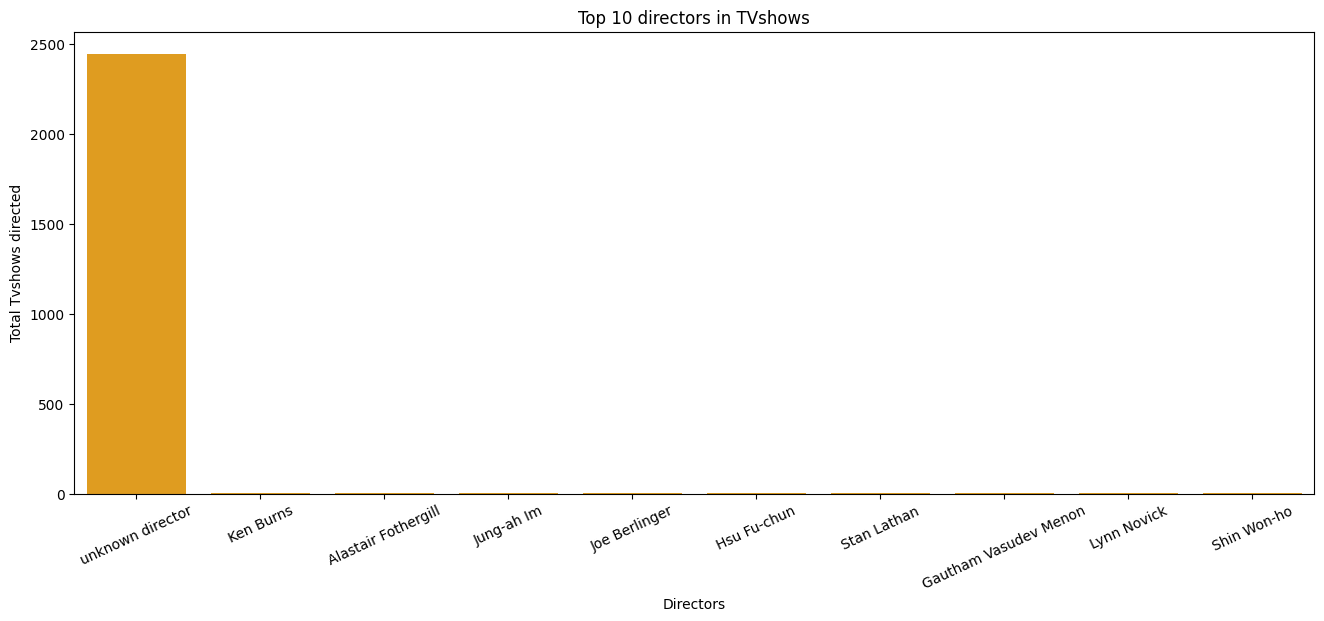

In [ ]:
plt.figure(figsize = (16,6))
sns.barplot(data =top_10_directors_in_TVshows, x = 'director', y = 'title', color = 'orange')
plt.title('Top 10 directors in TVshows')
plt.xlabel('Directors')
plt.ylabel('Total Tvshows directed')
plt.xticks(rotation = 25)

---> As majority of directors in TVshowsa are unknown values, i cannot give any probabale insight or recommendation.

<<<<<<<<--------------------------------------------------------->>>>>>>>

5. **Most produced genre content in movies and TVshows**

(i) Most produced genre content in Movies

In [50]:
most_popular_genre_movies = df[df['type'] == 'Movie'].groupby('listed_in')['title'].nunique()
most_popular_genre_movies = most_popular_genre_movies.sort_values(ascending = False)
most_popular_genre_movies = most_popular_genre_movies.reset_index()
most_popular_genre_movies

,listed_in,title
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,Documentaries,869
4,Action & Adventure,859
5,Independent Movies,756
6,Children & Family Movies,641
7,Romantic Movies,616
8,Thrillers,577
9,Music & Musicals,375


Graphical representation of most produced movie genres

Text(0, 0.5, 'Genre')

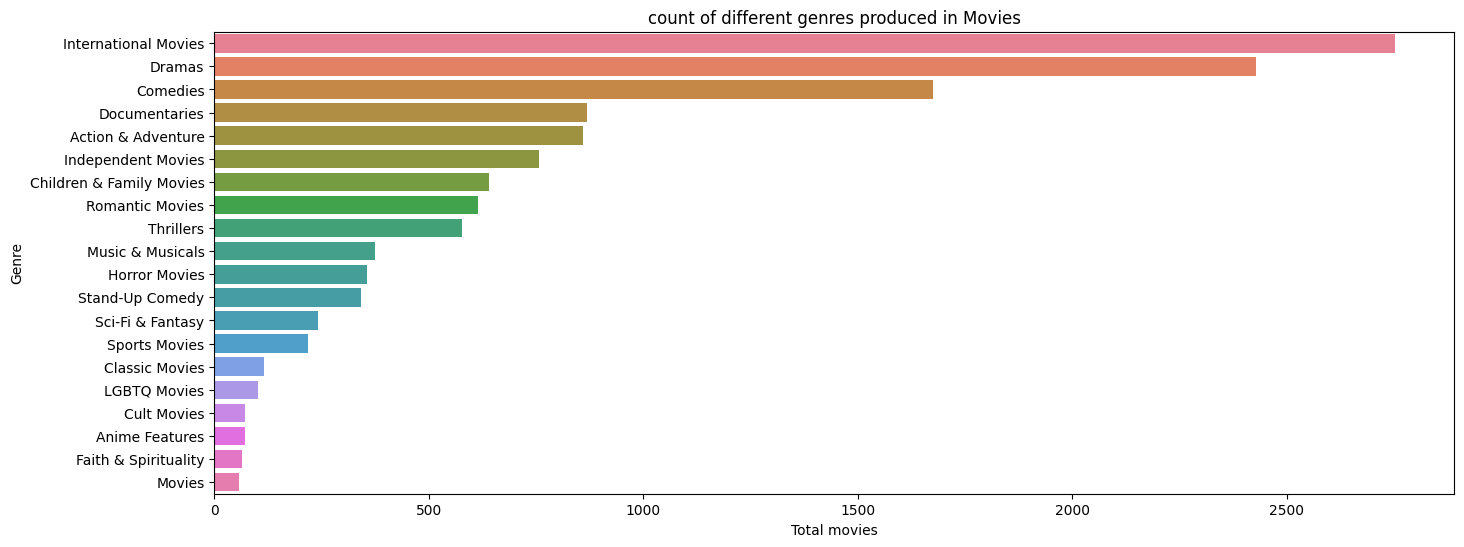

In [ ]:
plt.figure(figsize = (16,6))
sns.barplot(data = most_popular_genre_movies, x = 'title', y = 'listed_in', hue = 'listed_in')
plt.title('count of different genres produced in Movies')
plt.xlabel('Total movies')
plt.ylabel('Genre')


(ii) Most produced genre content in TVshows

In [51]:
most_popular_genre_TVshows = df[df['type'] == 'TV Show'].groupby('listed_in')['title'].nunique()
most_popular_genre_TVshows = most_popular_genre_TVshows.sort_values(ascending = False)
most_popular_genre_TVshows = most_popular_genre_TVshows.reset_index()
most_popular_genre_TVshows

,listed_in,title
0,International TV Shows,1351
1,TV Dramas,763
2,TV Comedies,581
3,Crime TV Shows,470
4,Kids' TV,451
5,Docuseries,395
6,Romantic TV Shows,370
7,Reality TV,255
8,British TV Shows,253
9,Anime Series,176


Graphical representation of most produced Tvshow genres

Text(0, 0.5, 'genres')

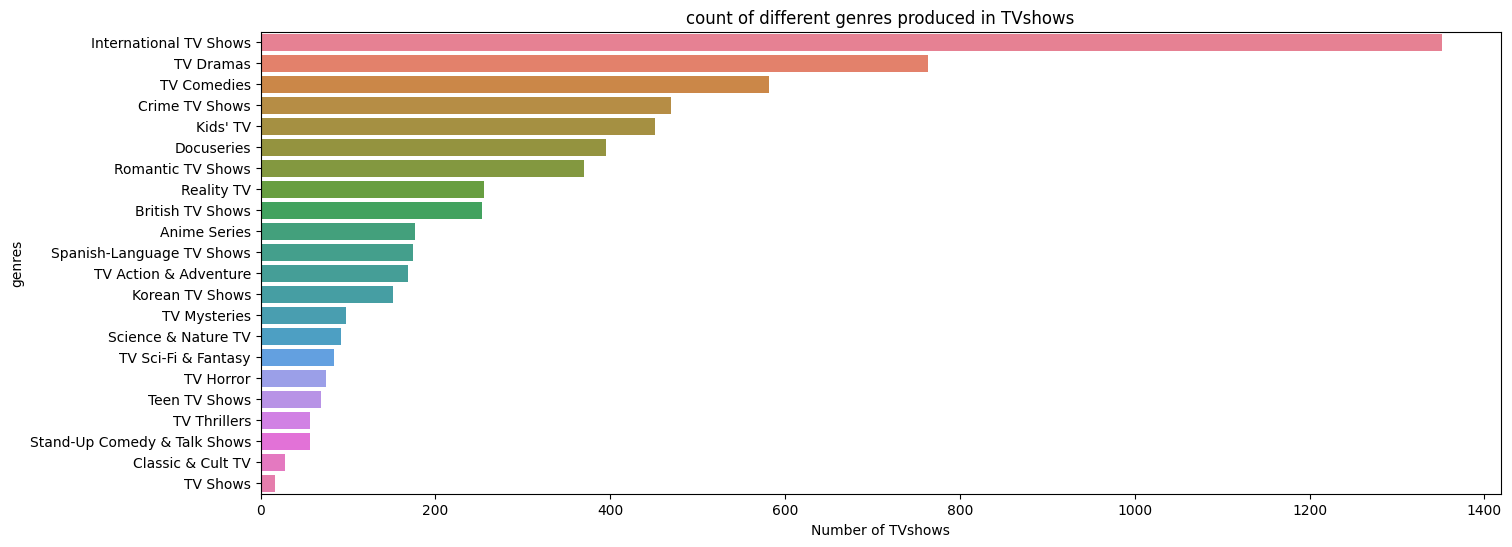

In [ ]:
plt.figure(figsize = (16,6))
sns.barplot(data = most_popular_genre_TVshows, x = 'title', y = 'listed_in', hue = 'listed_in')
plt.title('count of different genres produced in TVshows')
plt.xlabel('Number of TVshows')
plt.ylabel('genres')


---> Because of the splitting of of 'listed_in' column, we have a repeated count of the movie titles which comes under multiple genres.
But anyway our insight doesn't get affected.

**Insight:** (Movies) Looking at the graph of Top genres in movies, we can observe that major movie tites belong to these five genres 'International Movies', 'Dramas', 'comedies', 'Documentaries', and 'Action & Adventure'. And the bottom ones are 'LGTBQ+', 'cult', 'family /spirituality' and 'Anime'.

(TVshows) Looking at the graph of Top ten genres in TVshows, we can observe that major TVshow titles belong to these five genres 'International TV shows', 'Drama', 'Comedies', 'crime', and 'Kids'. But if we observe the bottom ones we can see genres like 'horror', 'teen shows', 'thrillers', 'stand_up comedy & talkshows', and 'cult'.

**Recommedation:** Upon closer examination of both graphs, it becomes evident that the majority of productions, whether movies or TV shows, fall under genres such as International, Comedy, or Drama, or a combination thereof. This combination emerges as a high priority. Notably, the genre 'Cult,' which occupies the bottom position in both movies and TV shows, is underproduced and not recommended.







<<<<<<<<--------------------------------------------------------->>>>>>>>

6. **What kind of content is available in different countries?**

(i) Number of movies produced grouping under countries and genres

In [52]:
division_of_Moviegenre_in_countries = df[df['type'] == 'Movie'].groupby(['country','listed_in'])['title'].nunique()
division_of_Moviegenre_in_countries = division_of_Moviegenre_in_countries.sort_values(ascending = False).head(20)
division_of_Moviegenre_in_countries = division_of_Moviegenre_in_countries.reset_index()
division_of_Moviegenre_in_countries

,country,listed_in,title
0,India,International Movies,864
1,United States,Dramas,835
2,United States,Comedies,680
3,India,Dramas,662
4,United States,Documentaries,511
5,United States,Action & Adventure,404
6,United States,Independent Movies,390
7,United States,Children & Family Movies,390
8,India,Comedies,323
9,United States,Thrillers,292


Graphical representation of Movies produced under different genres in different countries

<ipython-input-129-aaaa6d90e851>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:r'` for the same effect.

  sns.barplot(data = division_of_Moviegenre_in_countries, x='country', y = 'title', hue ='listed_in', color = 'r')


Text(0, 0.5, 'Total Movies')

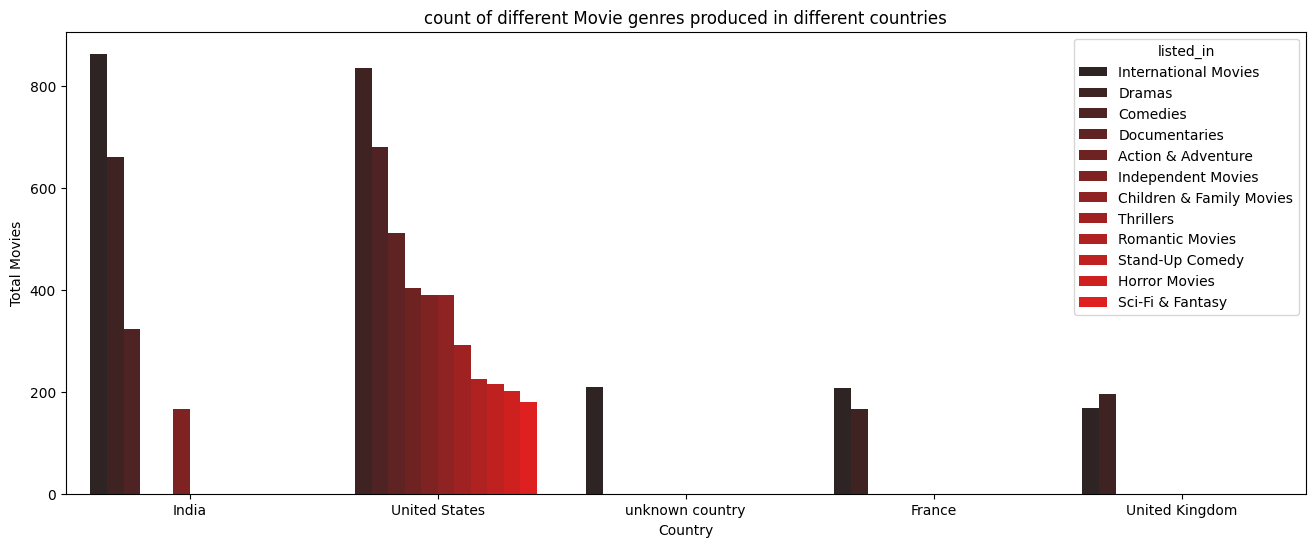

In [ ]:
plt.figure(figsize = (16,6))
sns.barplot(data = division_of_Moviegenre_in_countries, x='country', y = 'title', hue ='listed_in', color = 'r')
plt.title('count of different Movie genres produced in different countries')
plt.xlabel('Country')
plt.ylabel('Total Movies')


(ii) Number of TVshows produced grouping under countries and genres

In [53]:
division_of_genre_in_countries = df[df['type'] == 'TV Show'].groupby(['country','listed_in'])['title'].nunique()
division_of_genre_in_countries = division_of_genre_in_countries.sort_values(ascending = False).head(20)
division_of_genre_in_countries = division_of_genre_in_countries.reset_index()
division_of_genre_in_countries


,country,listed_in,title
0,United States,TV Comedies,258
1,United States,TV Dramas,232
2,United Kingdom,British TV Shows,225
3,unknown country,International TV Shows,223
4,United States,Kids' TV,214
5,United States,Docuseries,192
6,South Korea,International TV Shows,152
7,Japan,International TV Shows,151
8,United States,Crime TV Shows,145
9,Japan,Anime Series,143


Graphical representation of TVshows produced under different genres in different countries

<ipython-input-133-3c9b26cb6eee>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:r'` for the same effect.

  sns.barplot(data = division_of_genre_in_countries, x='country', y = 'title', hue ='listed_in', color = 'r')


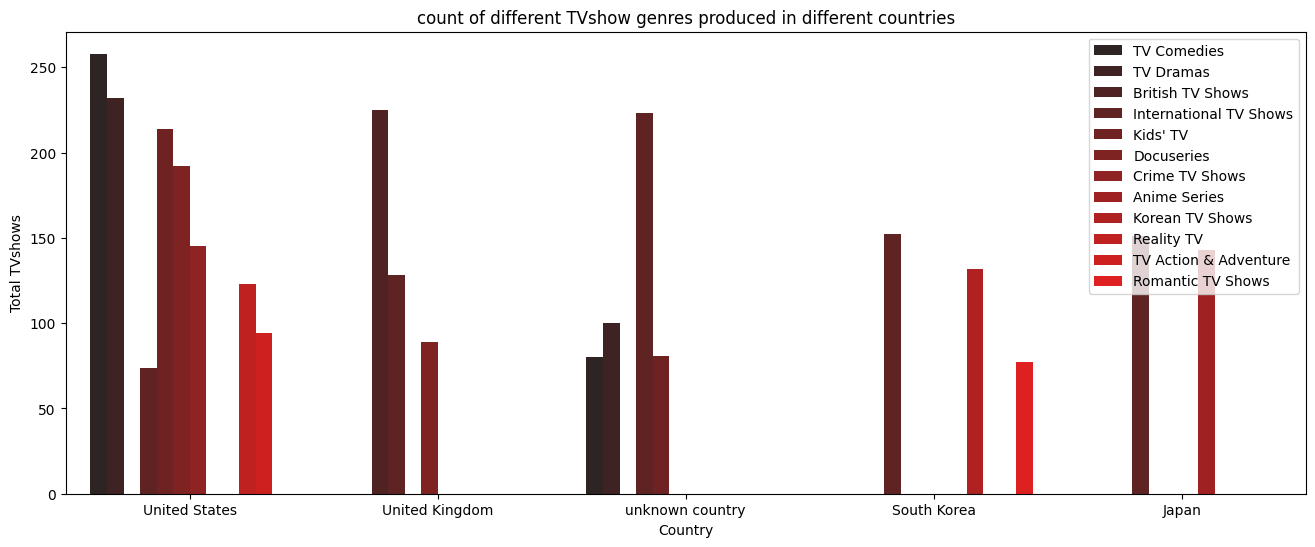

In [ ]:
plt.figure(figsize = (16,6))
sns.barplot(data = division_of_genre_in_countries, x='country', y = 'title', hue ='listed_in', color = 'r')
plt.title('count of different TVshow genres produced in different countries')
plt.xlabel('Country')
plt.ylabel('Total TVshows')
plt.legend(loc = 'upper right')


**Insight:** (Movies) Observing the graph of movies produced under different genres in different countries we can pretty much conclude that USA tops in Netflix listing of movies in different genres, it occupied almost all 12 movie genres with a staggering record. While on the other hand India holds high count in genres like International, dramas and comedies. Coming to countries like UK & France they were max occupied with genres like International & Drama.

(TVshows) Observing the graph of TVshows produced under different genres in different countries we can reasonably conclude that again Netflix hosts most diverse contet from USA. 'Britian' similar to their movies production, were sticking with Dramas and domestic britian TVshows. Other countries like South korea and japan are producing International TV shows and their individual domestic Tvshows.

**Recommendation:** For both Movies and TVshows, American content is the best one running in netflix. Genres like International, Comedy, Dramas, Action, Documentaries have very strong viewership; hence focusing on american content withrespect to these genres yield high results. And then content from UK holds second most advantageous position for both movies and TVshows in similar genres. After that we have other countries like India, which is an emerging online streaming platform for movies genres like International, dramas and comedies. Also eastern countries like Japan and korea were noticed for their distinct, feelgood romantic TVshows.

<<<<<<<<--------------------------------------------------------->>>>>>>>

---> Formatting 'date_added' column to extract week and month

In [54]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [55]:
df['week_added'] = df['date_added'].dt.isocalendar().week

In [56]:
df['month_added'] = df['date_added'].dt.month

7. **Analysis on best time to launch Movies/TVshows**

(i) Best Week and Month to launch Movies

Best weeks

In [57]:
best_week_to_launch_movies = df[df['type'] == 'Movie'].groupby('week_added')['title'].nunique()
best_week_to_launch_movies = best_week_to_launch_movies.sort_index()
best_week_to_launch_movies = best_week_to_launch_movies.reset_index()
best_week_to_launch_movies

,week_added,title
0,1,316
1,2,78
2,3,81
3,4,56
4,5,135
5,6,64
6,7,106
7,8,72
8,9,207
9,10,107


Best months

In [58]:
best_month_to_launch_movies = df[df['type'] == 'Movie'].groupby('month_added')['title'].nunique()
best_month_to_launch_movies = best_month_to_launch_movies.sort_index()
best_month_to_launch_movies = best_month_to_launch_movies.reset_index()
best_month_to_launch_movies

,month_added,title
0,1.0,546
1,2.0,382
2,3.0,529
3,4.0,550
4,5.0,439
5,6.0,492
6,7.0,565
7,8.0,519
8,9.0,519
9,10.0,545


Graphical representation of best weeks/months for launching movies using barplot

Text(0, 0.5, 'Total Movies Released')

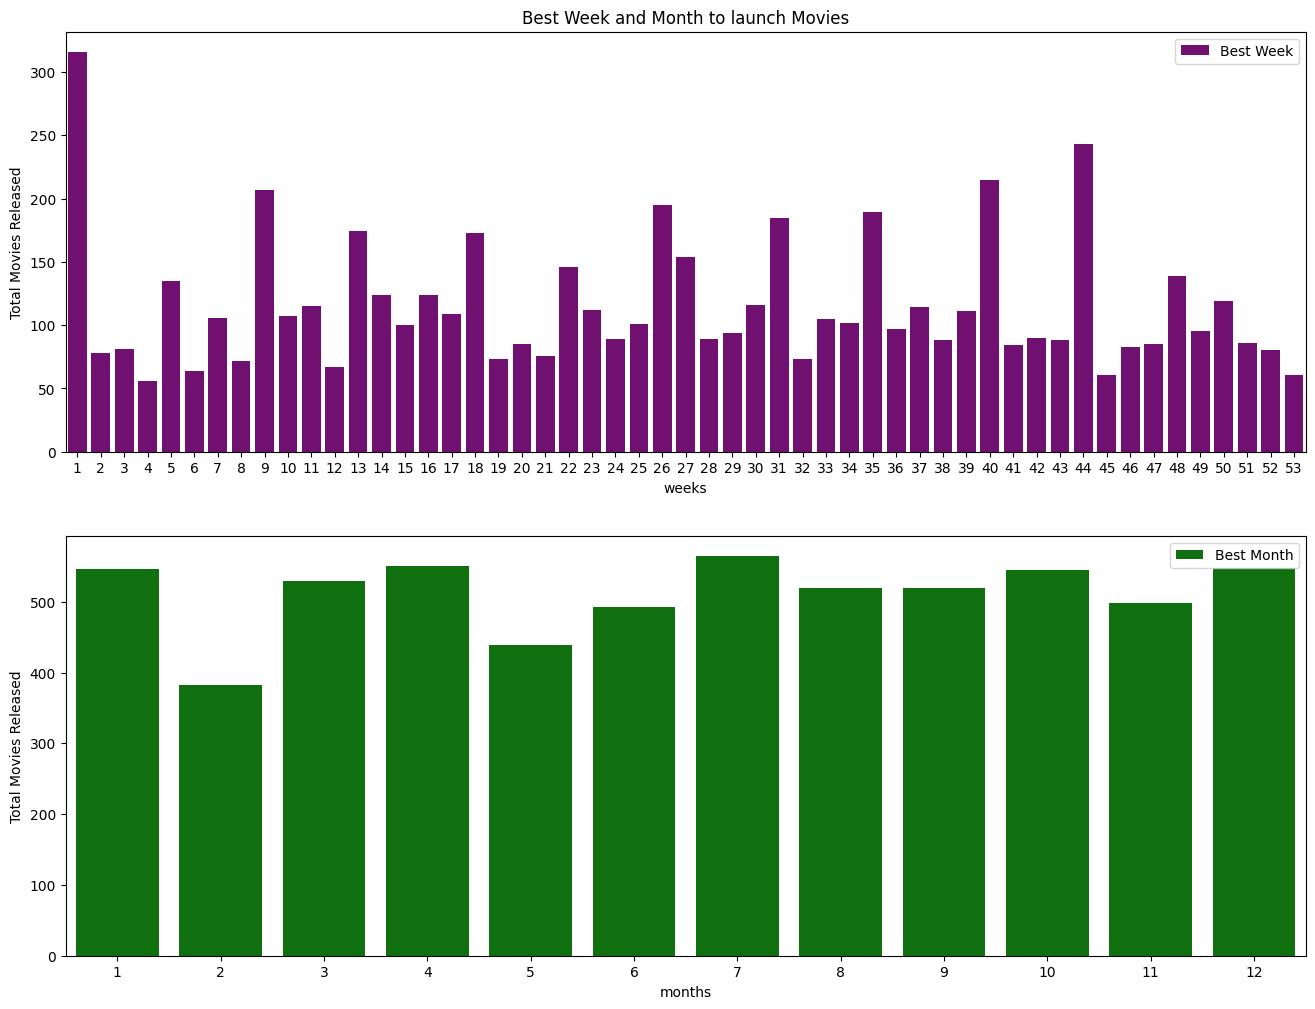

In [ ]:
plt.figure(figsize=(16, 12))

plt.subplot(2,1,1)
sns.barplot(data = best_week_to_launch_movies, x = 'week_added', y='title', label='Best Week', color='Purple')
plt.title('Best Week and Month to launch Movies')
plt.xlabel('weeks')
plt.ylabel('Total Movies Released')


plt.subplot(2,1,2)
sns.barplot(data = best_month_to_launch_movies, x = 'month_added', y='title', label='Best Month', color='Green')
plt.xlabel('months')
plt.ylabel('Total Movies Released')

Ignoring the first week in the both graph, as by default the null values in the date_added column are replaced by a default value '01-01-1970'

**Insight:** (Movies) If we observe the graph, most movies were released on 44th week and 7th month. Weeks like 9th, 13th, 18th, 22nd, 26th, 27th, 31st, 35th, 40th, 44th  held as major weeks for movie releases. And coming to months, all most every month except 2 and 5 held most releases on netflix.

**Recommendation:** At the beginning of six months, releasing movies during first and second weeks tend to be higher, thus, the same was suggested, whereas coming to the other half, releasing the movies in 3rd and 4th weeks tends to be desirable.

(ii) Best Week and month to launch TVshows

Best weeks

In [59]:
best_week_to_launch_TVshows = df[df['type'] == 'TV Show'].groupby('week_added')['title'].nunique()
best_week_to_launch_TVshows = best_week_to_launch_TVshows.sort_index()
best_week_to_launch_TVshows =best_week_to_launch_TVshows.reset_index()
best_week_to_launch_TVshows

,week_added,title
0,1,52
1,2,26
2,3,31
3,4,31
4,5,68
5,6,33
6,7,41
7,8,37
8,9,46
9,10,28


Best months

In [60]:
best_month_to_launch_TVshows = df[df['type'] == 'TV Show'].groupby('month_added')['title'].nunique()
best_month_to_launch_TVshows = best_month_to_launch_TVshows.sort_index()
best_month_to_launch_TVshows = best_month_to_launch_TVshows.reset_index()
best_month_to_launch_TVshows

,month_added,title
0,1.0,181
1,2.0,175
2,3.0,205
3,4.0,209
4,5.0,187
5,6.0,232
6,7.0,254
7,8.0,230
8,9.0,246
9,10.0,210


Graphical representation of best weeks/months for launching TVshows using barplot

Text(0, 0.5, 'Total TVshows Released')

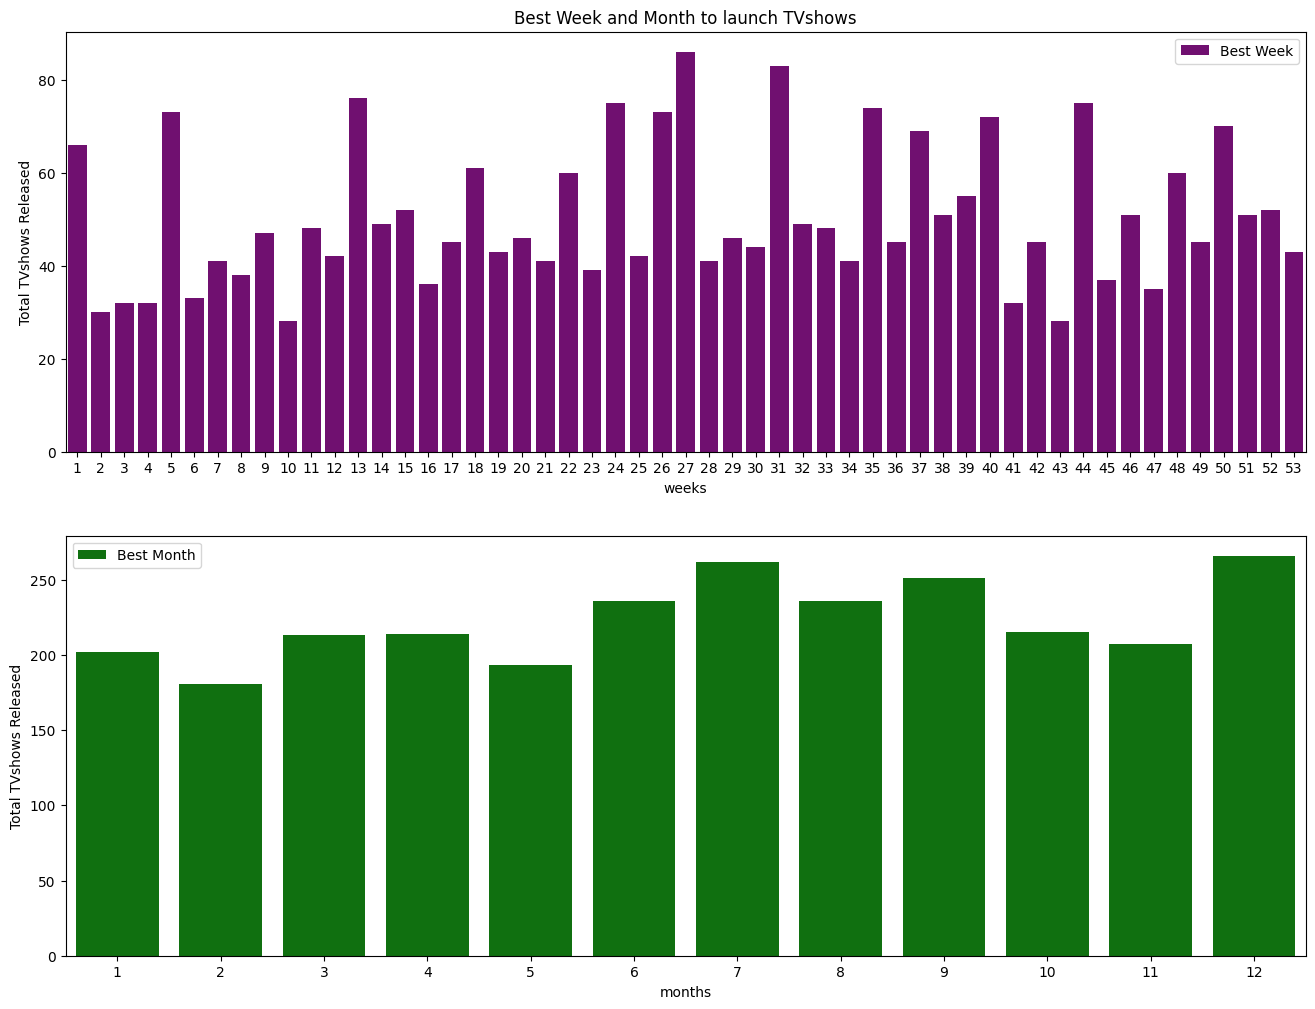

In [ ]:
plt.figure(figsize=(16, 12))

plt.subplot(2,1,1)
sns.barplot(data =best_week_to_launch_TVshows, x = 'week_added', y = 'title', label='Best Week', color='Purple')
plt.title('Best Week and Month to launch TVshows')
plt.xlabel('weeks')
plt.ylabel('Total TVshows Released')


plt.subplot(2,1,2)
sns.barplot(data = best_month_to_launch_TVshows, x = 'month_added', y= 'title', label='Best Month', color='Green')
plt.xlabel('months')
plt.ylabel('Total TVshows Released')

Ignoring the first week in the both graph, as by default the null values in the date_added column are replaced by a default value '01-01-1970'

**Insight:** (TVshows) If we observe the graph, most shows were released on 44th week and 7th month. Weeks like 5th, 13th, 18th, 24th, 26th, 27th, 31st, 35th, 37th, 40th, 44th, 48th, 50th  held as major weeks for Tvshow releases. And coming to months 6,7,8,9,12 held most releases.

**Recommendation:** Most TVshows were released more in 3rd and 4th weeks and hence releasing the future installations during these periods tend to be advantageous.

<<<<<<<<--------------------------------------------------------->>>>>>>>

8. **Finding how many approx years it takes for a movie/Tvshow to be added on netflix after its initial original release.**

In [61]:
df['year_diff'] = df['date_added'].dt.year - df['release_year']

---> Ignore (1970) year, they are by default **null_value replacement**

In [62]:
Approx_time_taken_in_years = df[['date_added', 'release_year', 'year_diff']]
Approx_time_taken_in_years.sort_values(by = 'year_diff', ascending = False)

,date_added,release_year,year_diff
4250,2018-12-30,1925,93.0
1331,2021-02-09,1945,76.0
8205,2017-03-31,1942,75.0
7790,2017-03-31,1942,75.0
7790,2017-03-31,1942,75.0
...,...,...,...
8712,NaT,2016,NaN
8712,NaT,2016,NaN
8712,NaT,2016,NaN
8755,NaT,2010,NaN


**Insight :** The highest time differnece is 93 years, which indicates that netflix often do hosts and experiment with some pretty old movies/TVshows. We also have movies/TvShows ageing in 70's and 60's.

**Recommendation:** Experimenting is good and sometimes a few old classics might savour the taste of niche group of audiences, but it was desiarble to focus on fresh content of movies/TVShows.



<<<<<<<<--------------------------------------------------------->>>>>>>>

9. **Finding which rating and genre combination holds more movie/TVshows releases.**

(i) Top 10 (rating and genre) combination holding most movies

In [63]:
movies_listed_under_ratings = df[df['type'] == 'Movie'].groupby(['rating', 'listed_in'])['title'].nunique()
movies_listed_under_ratings = movies_listed_under_ratings.sort_values(ascending = False).head(20)
movies_listed_under_ratings = movies_listed_under_ratings.reset_index()
movies_listed_under_ratings

,rating,listed_in,title
0,TV-MA,International Movies,1130
1,TV-14,International Movies,1065
2,TV-MA,Dramas,830
3,TV-14,Dramas,693
4,TV-14,Comedies,465
5,TV-MA,Comedies,431
6,R,Dramas,375
7,TV-MA,Independent Movies,344
8,TV-MA,Documentaries,321
9,TV-PG,International Movies,294


(ii) Top 10 (rating and genre) combination holding most TVshows

In [64]:
TVshows_listed_under_ratings = df[df['type'] == 'TV Show'].groupby(['rating', 'listed_in'])['title'].nunique()
TVshows_listed_under_ratings = TVshows_listed_under_ratings.sort_values(ascending = False).head(20)
TVshows_listed_under_ratings = TVshows_listed_under_ratings.reset_index()
TVshows_listed_under_ratings

,rating,listed_in,title
0,TV-MA,International TV Shows,714
1,TV-14,International TV Shows,472
2,TV-MA,TV Dramas,434
3,TV-MA,Crime TV Shows,350
4,TV-MA,TV Comedies,269
5,TV-14,TV Dramas,269
6,TV-14,Romantic TV Shows,190
7,TV-Y7,Kids' TV,189
8,TV-MA,Docuseries,179
9,TV-Y,Kids' TV,176


Graphical representation using **Heat map** of Genre and rating combination on movies/Tvshows

Text(0.5, 1.0, 'relationship between genre and rating in holding most TVshows')

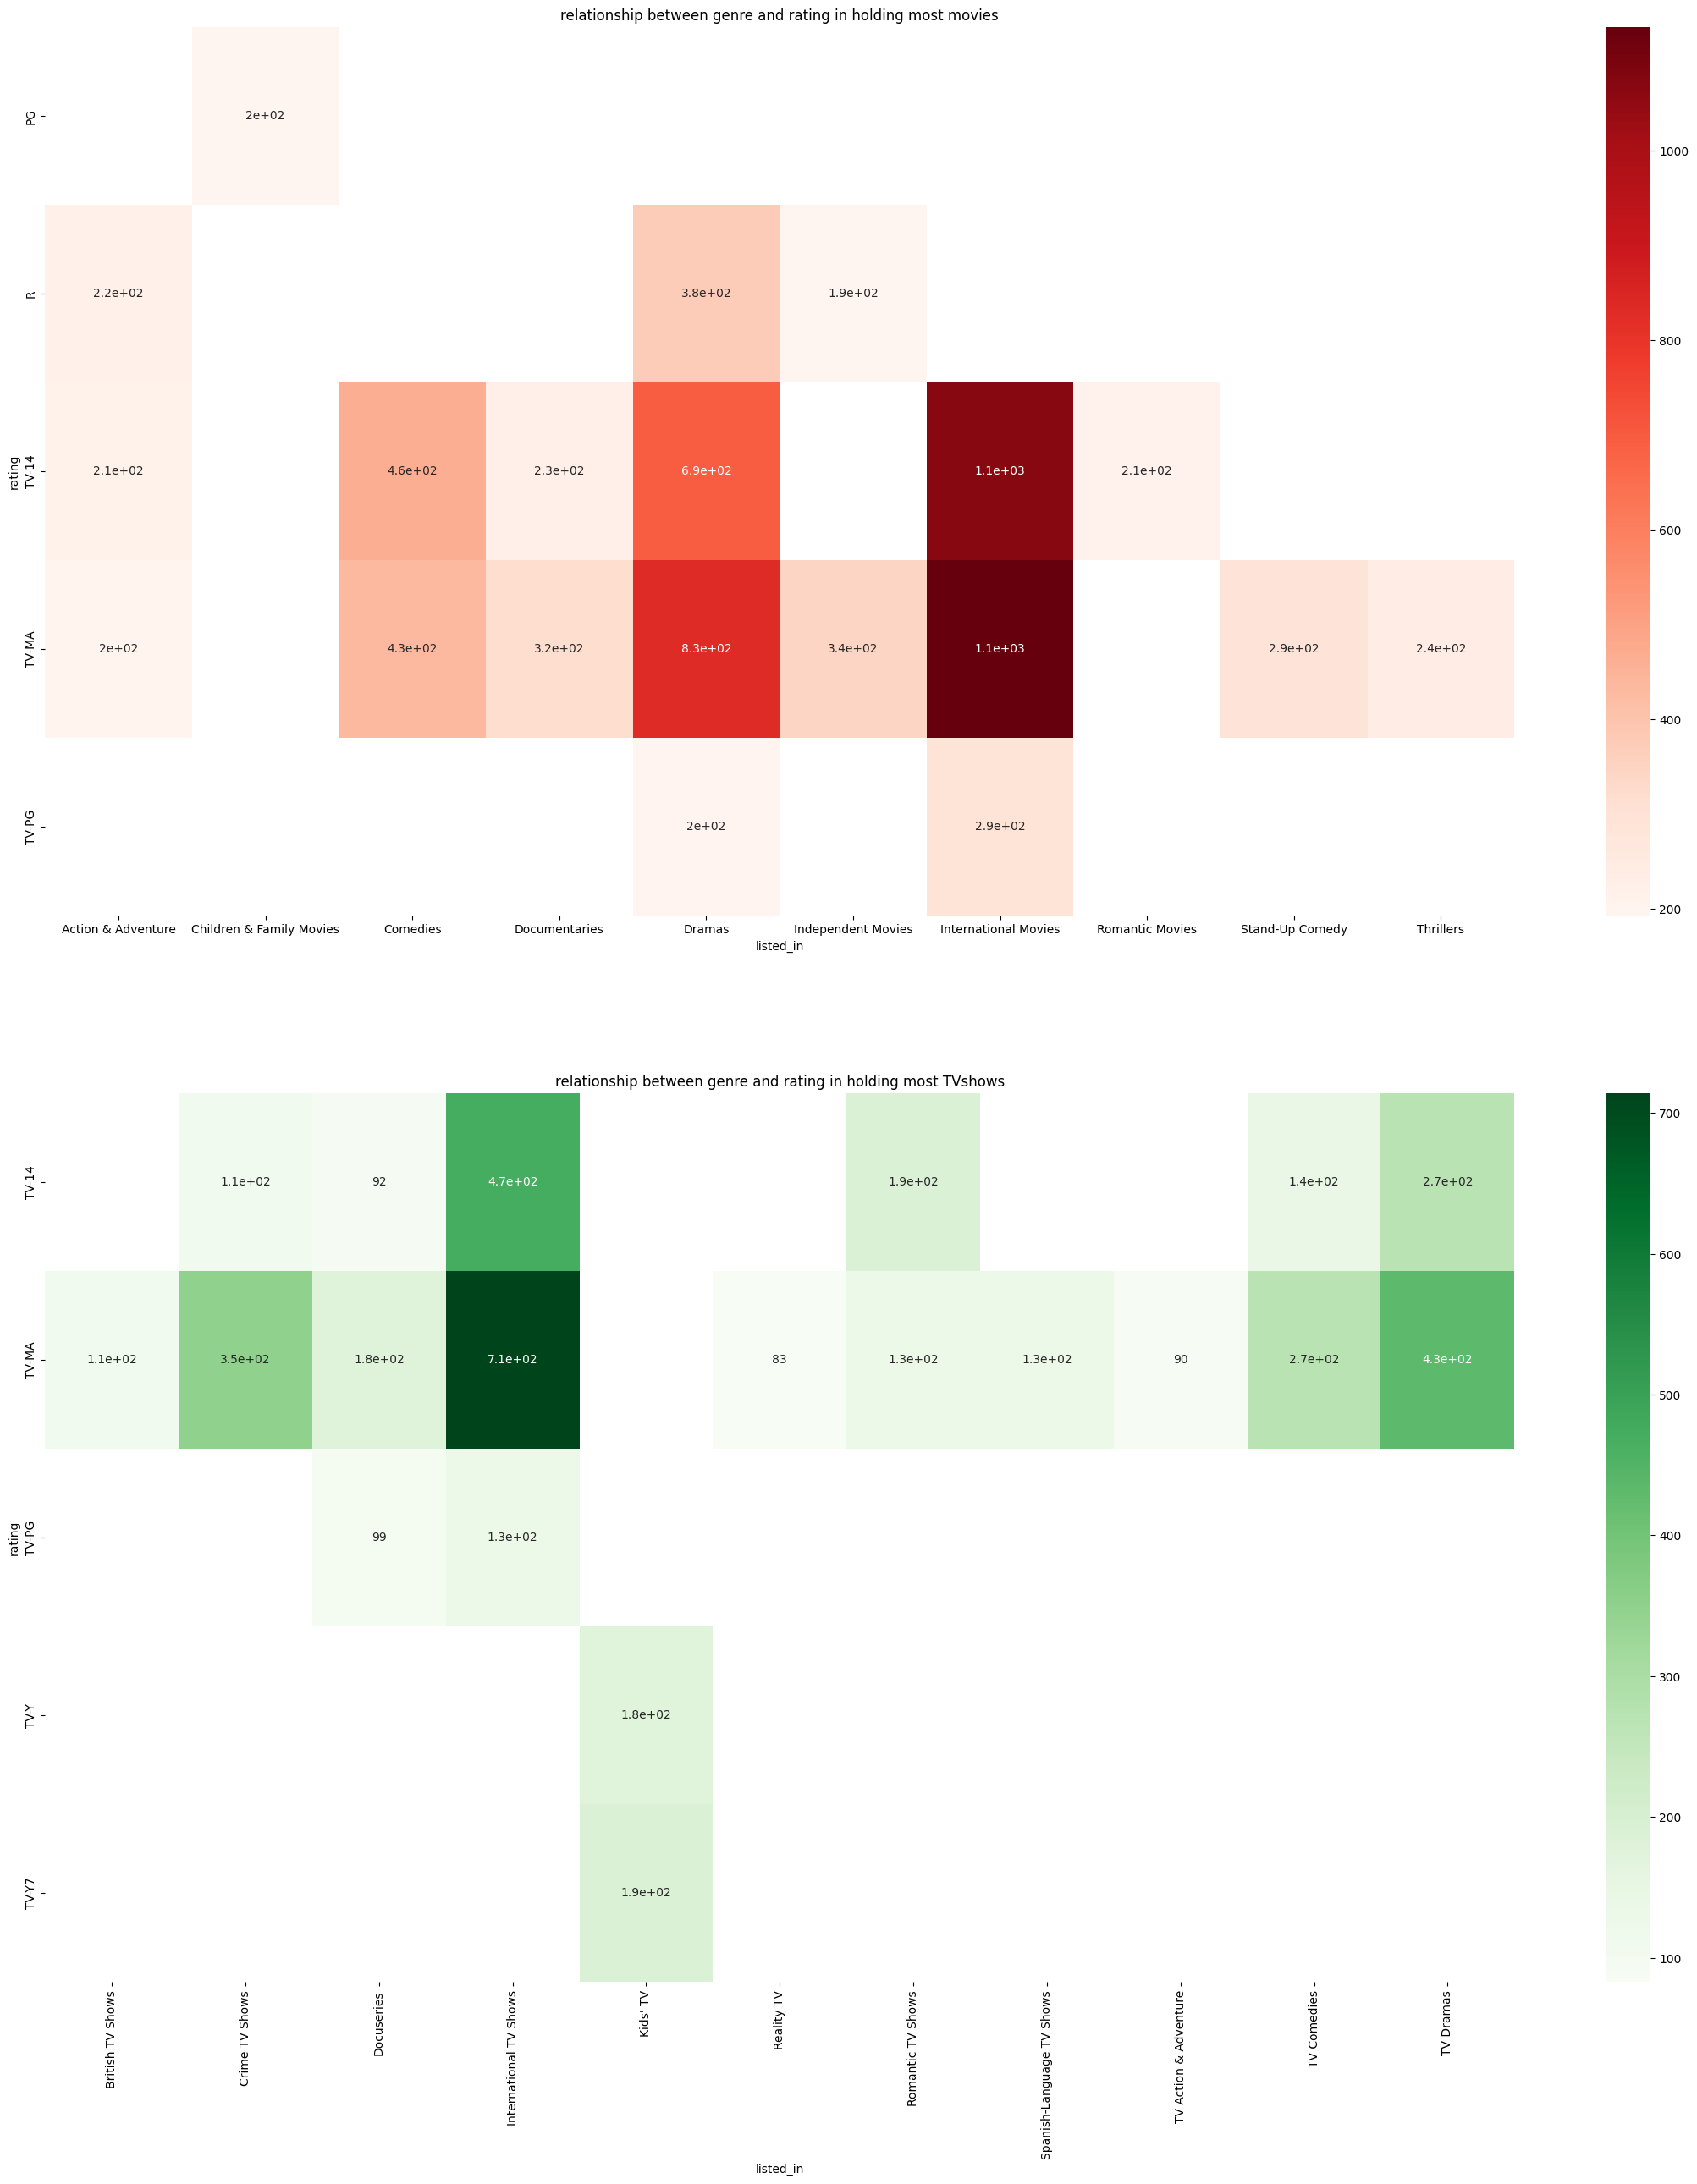

In [ ]:
plt.figure(figsize = (28, 30))
plt.subplot(2,1,1)
Movies_heat_map_data = movies_listed_under_ratings.pivot(index ='rating', columns ='listed_in', values ='title')
sns.heatmap(Movies_heat_map_data, annot=True, cmap = 'Reds')
plt.title('relationship between genre and rating in holding most movies')


plt.subplot(2,1,2)
TVshows_heat_map_data = TVshows_listed_under_ratings.pivot(index ='rating', columns ='listed_in', values ='title')
sns.heatmap(TVshows_heat_map_data, annot=True, cmap = 'Greens')
plt.title('relationship between genre and rating in holding most TVshows')

**Insight:** (Movies) Observing the Top 10 (rating and genre) combination holding most number of movies, thus, we can conclude that there was high positive correlation between majority of international movies and ratings like 'TV 14','TV MA'. Even majority of Dramas got the same types of correlation with similar ratings. Least correlation was observed in International movies and 'TV PG' rating, and other genres like Action&Adventure have least correlation with 'TV MA', 'TV 14' AND 'R' rating types and a few genres like Independent movies and Documentaries also have same correlation with 'TV MA'.

(TVshows): Observing the Top 10 (rating and genre) combination holding most TVShows, we can conclude that there is high positive correlation between majority of international TVshows and
'TV MA','TV 14' rating types. Least correlation was observed in Docuseries with 'TV PG','TV 14', and even shows like Realities and adventures have less correlation with TV MA rating. Same follows with Kids-TV and 'TV Y7', 'TV Y' rating types which have low correlation.

**Recommendation:** As most movies and TVshows hosted in Netflix belong to 'TV MA' rating type and holds good positive correlation; It is advantageous to lauch contents like, International movies/TVshows and Dramas with similar style and theme which ultimately falls under the above rating.

<<<<<<<<--------------------------------------------------------->>>>>>>>

10. **Count of Movie/TVshows titles grouping under duration**

(i) Top 10 Movie runtimes holding most number of movies

In [65]:
Number_of_different_Movie_runtime = df[df['type'] == 'Movie'].groupby('duration')['title'].nunique()
Number_of_different_Movie_runtime  = Number_of_different_Movie_runtime.sort_values(ascending = False).head(10)
Number_of_different_Movie_runtime = Number_of_different_Movie_runtime.reset_index()
Number_of_different_Movie_runtime

,duration,title
0,90 min,152
1,94 min,146
2,93 min,146
3,97 min,146
4,91 min,144
5,95 min,137
6,96 min,130
7,92 min,129
8,102 min,122
9,98 min,120


(ii) finding under what number of Seasons netflix produced most numebr of TVshows

In [66]:
Number_of_different_seasons = df[df['type'] == 'TV Show'].groupby('duration')['title'].nunique()
Number_of_different_seasons = Number_of_different_seasons.sort_values(ascending = False)
Number_of_different_seasons = Number_of_different_seasons.reset_index()
Number_of_different_seasons

,duration,title
0,1 Season,1793
1,2 Seasons,425
2,3 Seasons,199
3,4 Seasons,95
4,5 Seasons,65
5,6 Seasons,33
6,7 Seasons,23
7,8 Seasons,17
8,9 Seasons,9
9,10 Seasons,7


Graphical representation of Movie/Tvshow durations using **Violin plot**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '1 Season'),
  Text(1, 0, '2 Seasons'),
  Text(2, 0, '3 Seasons'),
  Text(3, 0, '4 Seasons'),
  Text(4, 0, '5 Seasons'),
  Text(5, 0, '6 Seasons'),
  Text(6, 0, '7 Seasons'),
  Text(7, 0, '8 Seasons'),
  Text(8, 0, '9 Seasons'),
  Text(9, 0, '10 Seasons'),
  Text(10, 0, '13 Seasons'),
  Text(11, 0, '11 Seasons'),
  Text(12, 0, '12 Seasons'),
  Text(13, 0, '15 Seasons'),
  Text(14, 0, '17 Seasons')])

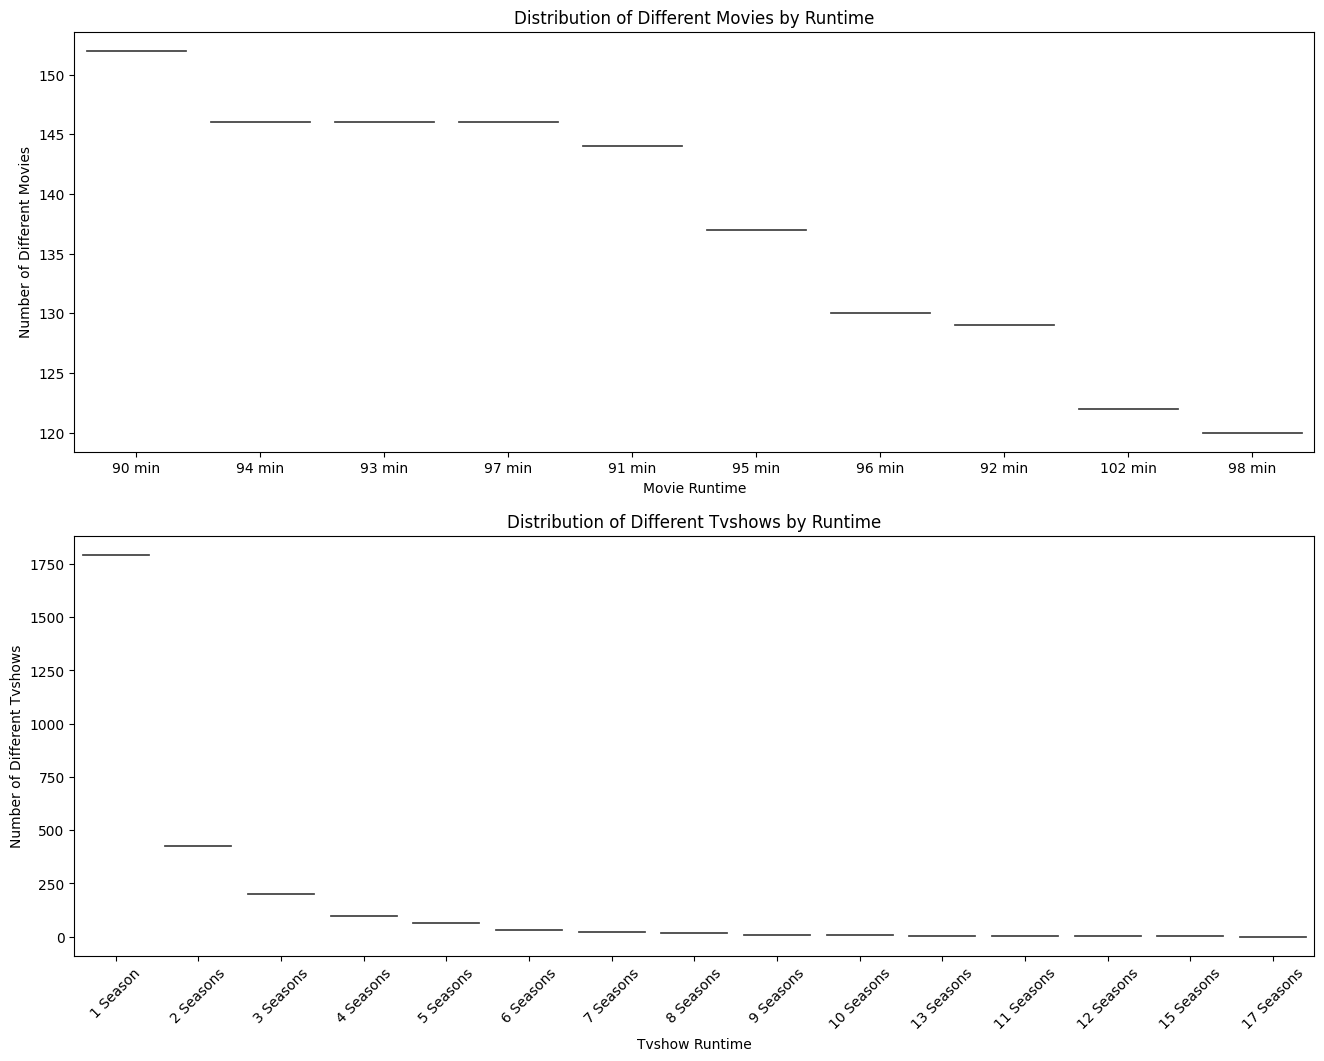

In [ ]:
plt.figure(figsize = (16,12))
plt.subplot(2,1,1)
sns.violinplot(x='duration', y='title', data=Number_of_different_Movie_runtime)
plt.title('Distribution of Different Movies by Runtime')
plt.xlabel('Movie Runtime')
plt.ylabel('Number of Different Movies')

plt.subplot(2,1,2)
sns.violinplot(x='duration', y='title', data=Number_of_different_seasons)
plt.title('Distribution of Different Tvshows by Runtime')
plt.xlabel('Tvshow Runtime')
plt.ylabel('Number of Different Tvshows')
plt.xticks(rotation = 45)


**Insight:** (Movies) If we observe the graph of different movies by runtime, we could oberve that most movies have a run time between 1:30 min to 1:40 min.

(TVhows) : If we observe the graph of different Tvshows by runtime, we could pretty much conclude that netflix majorily produces or hosts shows with max 1 season of runtime (contributing 67 %) of netflix total shows, and then next positions were occupied in a decreasing order of seasons. We have '17' TV shows crossing the mark of 10 seasons out of 2676 shows. And especially there is only one show that reached the mark of 17 seasons in total.

**Recommendation:**
Given that the majority of hosted movies are English, American, and British productions, the optimal duration falls between 1:30 and 1:40. However, for TV shows, the trend indicates that many conclude after their first season. Thus, extending beyond one season warrants careful consideration, with factors such as content, actors, and directors being crucial, particularly for genres with broad appeal like International Drama, Thriller, or Comedy.

In [ ]:
!pip install nbconvert

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fo

In [ ]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/Netflix-Dataset@Dhanureddy.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Netflix-Dataset@Dhanureddy.ipynb to pdf
[NbConvertApp] Support files will be in Netflix-Dataset@Dhanureddy_files/
[NbConvertApp] Making directory ./Netflix-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Netflix-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Netflix-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Netflix-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Netflix-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Netflix-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Netflix-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Netflix-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Netflix-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Netflix-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Netflix-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Netflix-Dataset@Dhanureddy_files
[NbConve

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive
